In [1]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline
import re
import nltk
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import wordnet
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)


from wordcloud import WordCloud


from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
#pip install wordcloud

In [3]:
dataset = "Electronics_5.json"
if os.path.isfile(dataset):
    df = pd.read_json("Electronics_5.json", lines=True)
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)
display(df.head())

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [4]:
df.to_csv("amazon.csv")

In [5]:
df=pd.read_csv("amazon.csv").drop("Unnamed: 0",axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689188 entries, 0 to 1689187
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   reviewerID      1689188 non-null  object
 1   asin            1689188 non-null  object
 2   reviewerName    1664309 non-null  object
 3   helpful         1689188 non-null  object
 4   reviewText      1688117 non-null  object
 5   overall         1689188 non-null  int64 
 6   summary         1689173 non-null  object
 7   unixReviewTime  1689188 non-null  int64 
 8   reviewTime      1689188 non-null  object
dtypes: int64(2), object(7)
memory usage: 116.0+ MB


In [7]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [8]:
df.drop(["reviewerID","asin","reviewerName","helpful","summary","unixReviewTime","reviewTime"],axis=1,inplace=True)

In [9]:
df.head()

,reviewText,overall
0,We got this GPS for my husband who is an (OTR)...,5
1,"I'm a professional OTR truck driver, and I bou...",1
2,"Well, what can I say. I've had this unit in m...",3
3,"Not going to write a long review, even thought...",2
4,I've had mine for a year and here's what we go...,1


In [10]:
df.dropna(how="any", axis=0, inplace=True)

In [11]:
df["reviewText"] = df["reviewText"].str.lower()
df["reviewText"] = df["reviewText"].str.replace("[^\w\s]","")
df["reviewText"] = df["reviewText"].str.replace("\d+","")
df["reviewText"] = df["reviewText"].str.replace("\n"," ").replace("\r","")

In [12]:
df.loc[df["overall"]==3, "sentiment"] = "neutral"
df.loc[df["overall"]<3, "sentiment"] = "negative"
df.loc[df["overall"]>3, "sentiment"] = "positive"

In [13]:
df.head()

,reviewText,overall,sentiment
0,we got this gps for my husband who is an otr o...,5,positive
1,im a professional otr truck driver and i bough...,1,negative
2,well what can i say ive had this unit in my t...,3,neutral
3,not going to write a long review even thought ...,2,negative
4,ive had mine for a year and heres what we got ...,1,negative


In [14]:
lemmatizer=WordNetLemmatizer()
df['lemmatize']=[[lemmatizer.lemmatize(i) for i in words] for words in df['reviewText'].values]

In [15]:
df[["polarity","subjectivity"]]=df["reviewText"].apply(lambda t:pd.Series(TextBlob(t).sentiment))

In [16]:
tokenizer=TreebankWordTokenizer()
df['tokenized']=[tokenizer.tokenize(str(i)) for i in df['reviewText'].values]

In [17]:
df.to_csv("result_df.csv")

In [18]:
df=pd.read_csv("result_df.csv").drop("Unnamed: 0", axis=1)

In [19]:
df.head()

,reviewText,overall,sentiment,lemmatize,polarity,subjectivity,tokenized
0,we got this gps for my husband who is an otr o...,5,positive,"['w', 'e', ' ', 'g', 'o', 't', ' ', 't', 'h', ...",0.250000,0.539744,"['we', 'got', 'this', 'gps', 'for', 'my', 'hus..."
1,im a professional otr truck driver and i bough...,1,negative,"['i', 'm', ' ', 'a', ' ', 'p', 'r', 'o', 'f', ...",0.062441,0.371296,"['im', 'a', 'professional', 'otr', 'truck', 'd..."
2,well what can i say ive had this unit in my t...,3,neutral,"['w', 'e', 'l', 'l', ' ', 'w', 'h', 'a', 't', ...",0.091970,0.411656,"['well', 'what', 'can', 'i', 'say', 'ive', 'ha..."
3,not going to write a long review even thought ...,2,negative,"['n', 'o', 't', ' ', 'g', 'o', 'i', 'n', 'g', ...",0.059561,0.405242,"['not', 'going', 'to', 'write', 'a', 'long', '..."
4,ive had mine for a year and heres what we got ...,1,negative,"['i', 'v', 'e', ' ', 'h', 'a', 'd', ' ', 'm', ...",-0.002932,0.488117,"['ive', 'had', 'mine', 'for', 'a', 'year', 'an..."


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688117 entries, 0 to 1688116
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   reviewText    1688117 non-null  object 
 1   overall       1688117 non-null  int64  
 2   sentiment     1688117 non-null  object 
 3   lemmatize     1688117 non-null  object 
 4   polarity      1688117 non-null  float64
 5   subjectivity  1688117 non-null  float64
 6   tokenized     1688117 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 90.2+ MB


In [21]:
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("wc.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=200).generate(' '.join(data))
    plt.figure(figsize=(20,10))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [22]:
possitive_sentiment=df[df["sentiment"]=="positive"]["reviewText"]
negative_sentiment=df[df["sentiment"]=="negative"]["reviewText"]
neutral_sentiment=df[df["sentiment"]=="neutral"]["reviewText"]

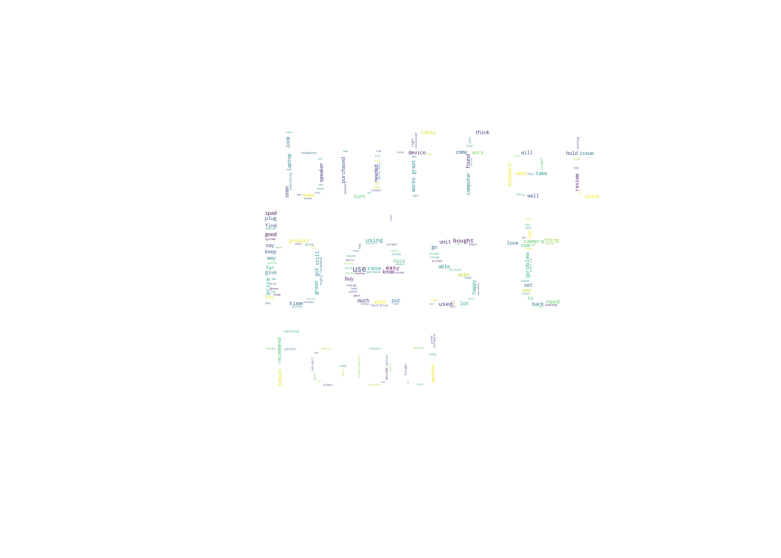

In [23]:
wc(possitive_sentiment,"white")

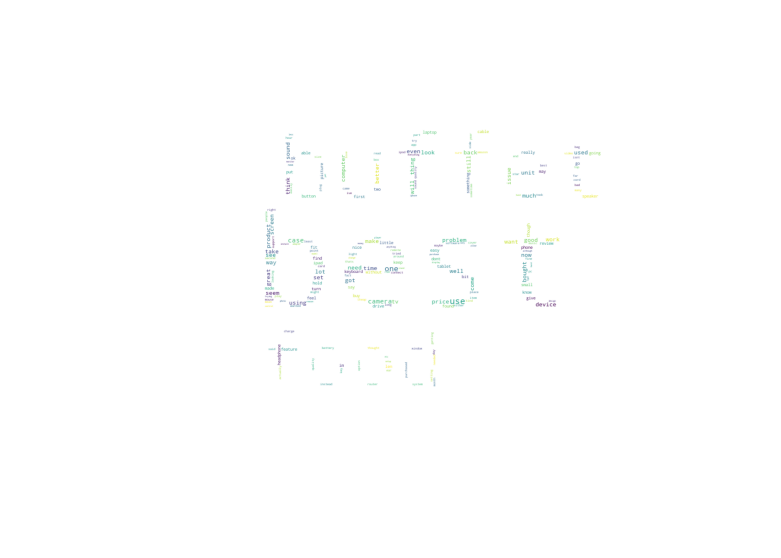

In [24]:
wc(neutral_sentiment,"white")

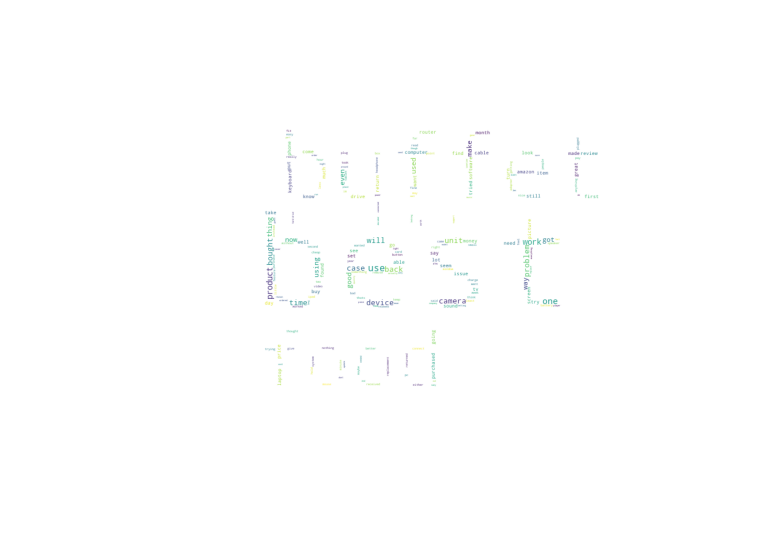

In [25]:
wc(negative_sentiment,"white")

In [26]:
df.overall=df.overall.astype("category")

In [27]:
x,y=df['reviewText'],df['sentiment']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [29]:
vect=CountVectorizer()
x_train_dtm=vect.fit_transform(x_train,y_train)
x_test_dtm=vect.transform(x_test)

In [30]:
b=MultinomialNB()
model=b.fit(x_train_dtm,y_train)
b_predict=b.predict(x_test_dtm)

In [31]:
accuracy_score(y_test,b_predict)

0.8374973343127265